<a href="https://colab.research.google.com/github/arkincognito/titanic/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import csv
import re
import numpy as np
pd.set_option('display.max_columns', None)
np.random.seed(13)
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
mpl.rcParams['axes.unicode_minus'] = False
set_matplotlib_formats('retina')
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/'My Drive'/'Colab Notebooks'/Kaggle/titanic

/content/drive/My Drive/Colab Notebooks/Kaggle/titanic


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Exploratory Data Analysis

Let's do EDA on the data and figure out some analysis points.

## Data overview
First, start by examining head(). This will give insights for feature engineering

In [ ]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


We can extract the 'Title' of each passenger from their 'Name'. Also, for the married female passengers, we can find the 'Full Name' of their husbands.

SibSp and Parch shows the number of close reletives board the ship. This may be critical for the passenger's survival.

Ticket information may hold information related to the traveling companions who are not related. Combined with the above reletives information, the traveling companion number may be a crucial parameter of the model.

Even from the head(), we can see that a lot of cabin values are missing.
Let's further look into the missing values from the data.

#Missing Data
We have to determine missing data, and how to feature engineer those missing values.

In [ ]:
print(train.info())
pd.merge(pd.DataFrame(train.isnull().sum(), columns = ['Null_cnt']), pd.DataFrame(train.notnull().sum(), columns = ['Filled_cnt']),left_index=True, right_index=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,Null_cnt,Filled_cnt
PassengerId,0,891
Survived,0,891
Pclass,0,891
Name,0,891
Sex,0,891
Age,177,714
SibSp,0,891
Parch,0,891
Ticket,0,891
Fare,0,891


In [ ]:
print(test.info())
pd.merge(pd.DataFrame(test.isnull().sum(), columns = ['Null_cnt']), pd.DataFrame(test.notnull().sum(), columns = ['Filled_cnt']),left_index=True, right_index=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


,Null_cnt,Filled_cnt
PassengerId,0,418
Pclass,0,418
Name,0,418
Sex,0,418
Age,86,332
SibSp,0,418
Parch,0,418
Ticket,0,418
Fare,1,417
Cabin,327,91


We'll need to estimate the Age, Fare, Cabin values if we wish to use them as features.

We could disregard data with missing Embarked values unless they hold some unique values in other columns.

# Statistical Description
Let's look at the Statistics of the numerical columns.

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Fare seems to have high std, and the extreme outlier judging by the high max value. This may show in the future plots.

Max age seems to be 80 and the min age is 0.42, which I'm assuming that person is 5 months old.

# Unique Values
Let's look into the cardinality of each columns.
We have 891 inputs for the training set.

In [ ]:
for col in train.columns:
    print(str(col) + ":" + '\t\t' + str(len(train[col].unique())) + '\t' + str(any(train[col].isnull())))

PassengerId:		891	False
Survived:		2	False
Pclass:		3	False
Name:		891	False
Sex:		2	False
Age:		89	True
SibSp:		7	False
Parch:		7	False
Ticket:		681	False
Fare:		248	False
Cabin:		148	True
Embarked:		4	True


Columns Name, Ticket, Fare, Cabin have high cardinality. Let's see the count of each values.

In [ ]:
for col in train.columns:
    print(col,'\n',train[col].value_counts().sort_index(),'\n--------------------------------')

PassengerId 
 1      1
2      1
3      1
4      1
5      1
      ..
887    1
888    1
889    1
890    1
891    1
Name: PassengerId, Length: 891, dtype: int64 
--------------------------------
Survived 
 0    549
1    342
Name: Survived, dtype: int64 
--------------------------------
Pclass 
 1    216
2    184
3    491
Name: Pclass, dtype: int64 
--------------------------------
Name 
 Abbing, Mr. Anthony                      1
Abbott, Mr. Rossmore Edward              1
Abbott, Mrs. Stanton (Rosa Hunt)         1
Abelson, Mr. Samuel                      1
Abelson, Mrs. Samuel (Hannah Wizosky)    1
                                        ..
de Mulder, Mr. Theodore                  1
de Pelsmaeker, Mr. Alfons                1
del Carlo, Mr. Sebastiano                1
van Billiard, Mr. Austin Blyler          1
van Melkebeke, Mr. Philemon              1
Name: Name, Length: 891, dtype: int64 
--------------------------------
Sex 
 female    314
male      577
Name: Sex, dtype: int64 
--------

There are some passengers with 0 Fare values. Later in the analysis, we'll take a look at the Fare value and survival rate to determine if these 0 values are sound values.

# Column Visualization with Seaborn
Let's draw charts to show relationship between Survival Rate and other columns.

## Color Setup
We'll start by setting up the palette. This will set uniform color scheme throughout the notebook, and give faster interpretation on the visualizations.

Also, I'll set the rcParams that would fit my dark background. You may change the COLOR to 'black' if you have bright background.

In [ ]:
palette = {'man':"#4682B4", 'woman':"#CD5C5C", 'child':"#2E8B57", 'male':"#6495ED",\
           'female':"#F08080", 0:"#9c9c9c", 1:"#BD1A2A"}
COLOR = 'white'
mpl.rcParams['text.color'] = 'black' # Default text color(including legend)
mpl.rcParams['axes.labelcolor'] = COLOR # Axes label color
mpl.rcParams['axes.titlecolor'] = COLOR # Subplot Title Color
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
#FFB3BA
#FFDFBA
#FFFFBA
#BAFFC9
#BAE1FF

## Histplot
Let's draw the histplot on 6 parameters, Pclass, Sex, Ags, SibSp, Parch, Embarked.

We'll deal with 

For Sex, I'd like to see the ratio of survival on each sex, and the actual count of survival and deaths.

Age ranges from 0.42 to 80, so we'll bin into 30 bins.

Fare had extremely high max value and low standard deviation. We could assume the histplot will have very thin tail at the end, and wouldn't be visible. Let's plot Fare in a separate plot, using violinplot and stripplot afterwards.

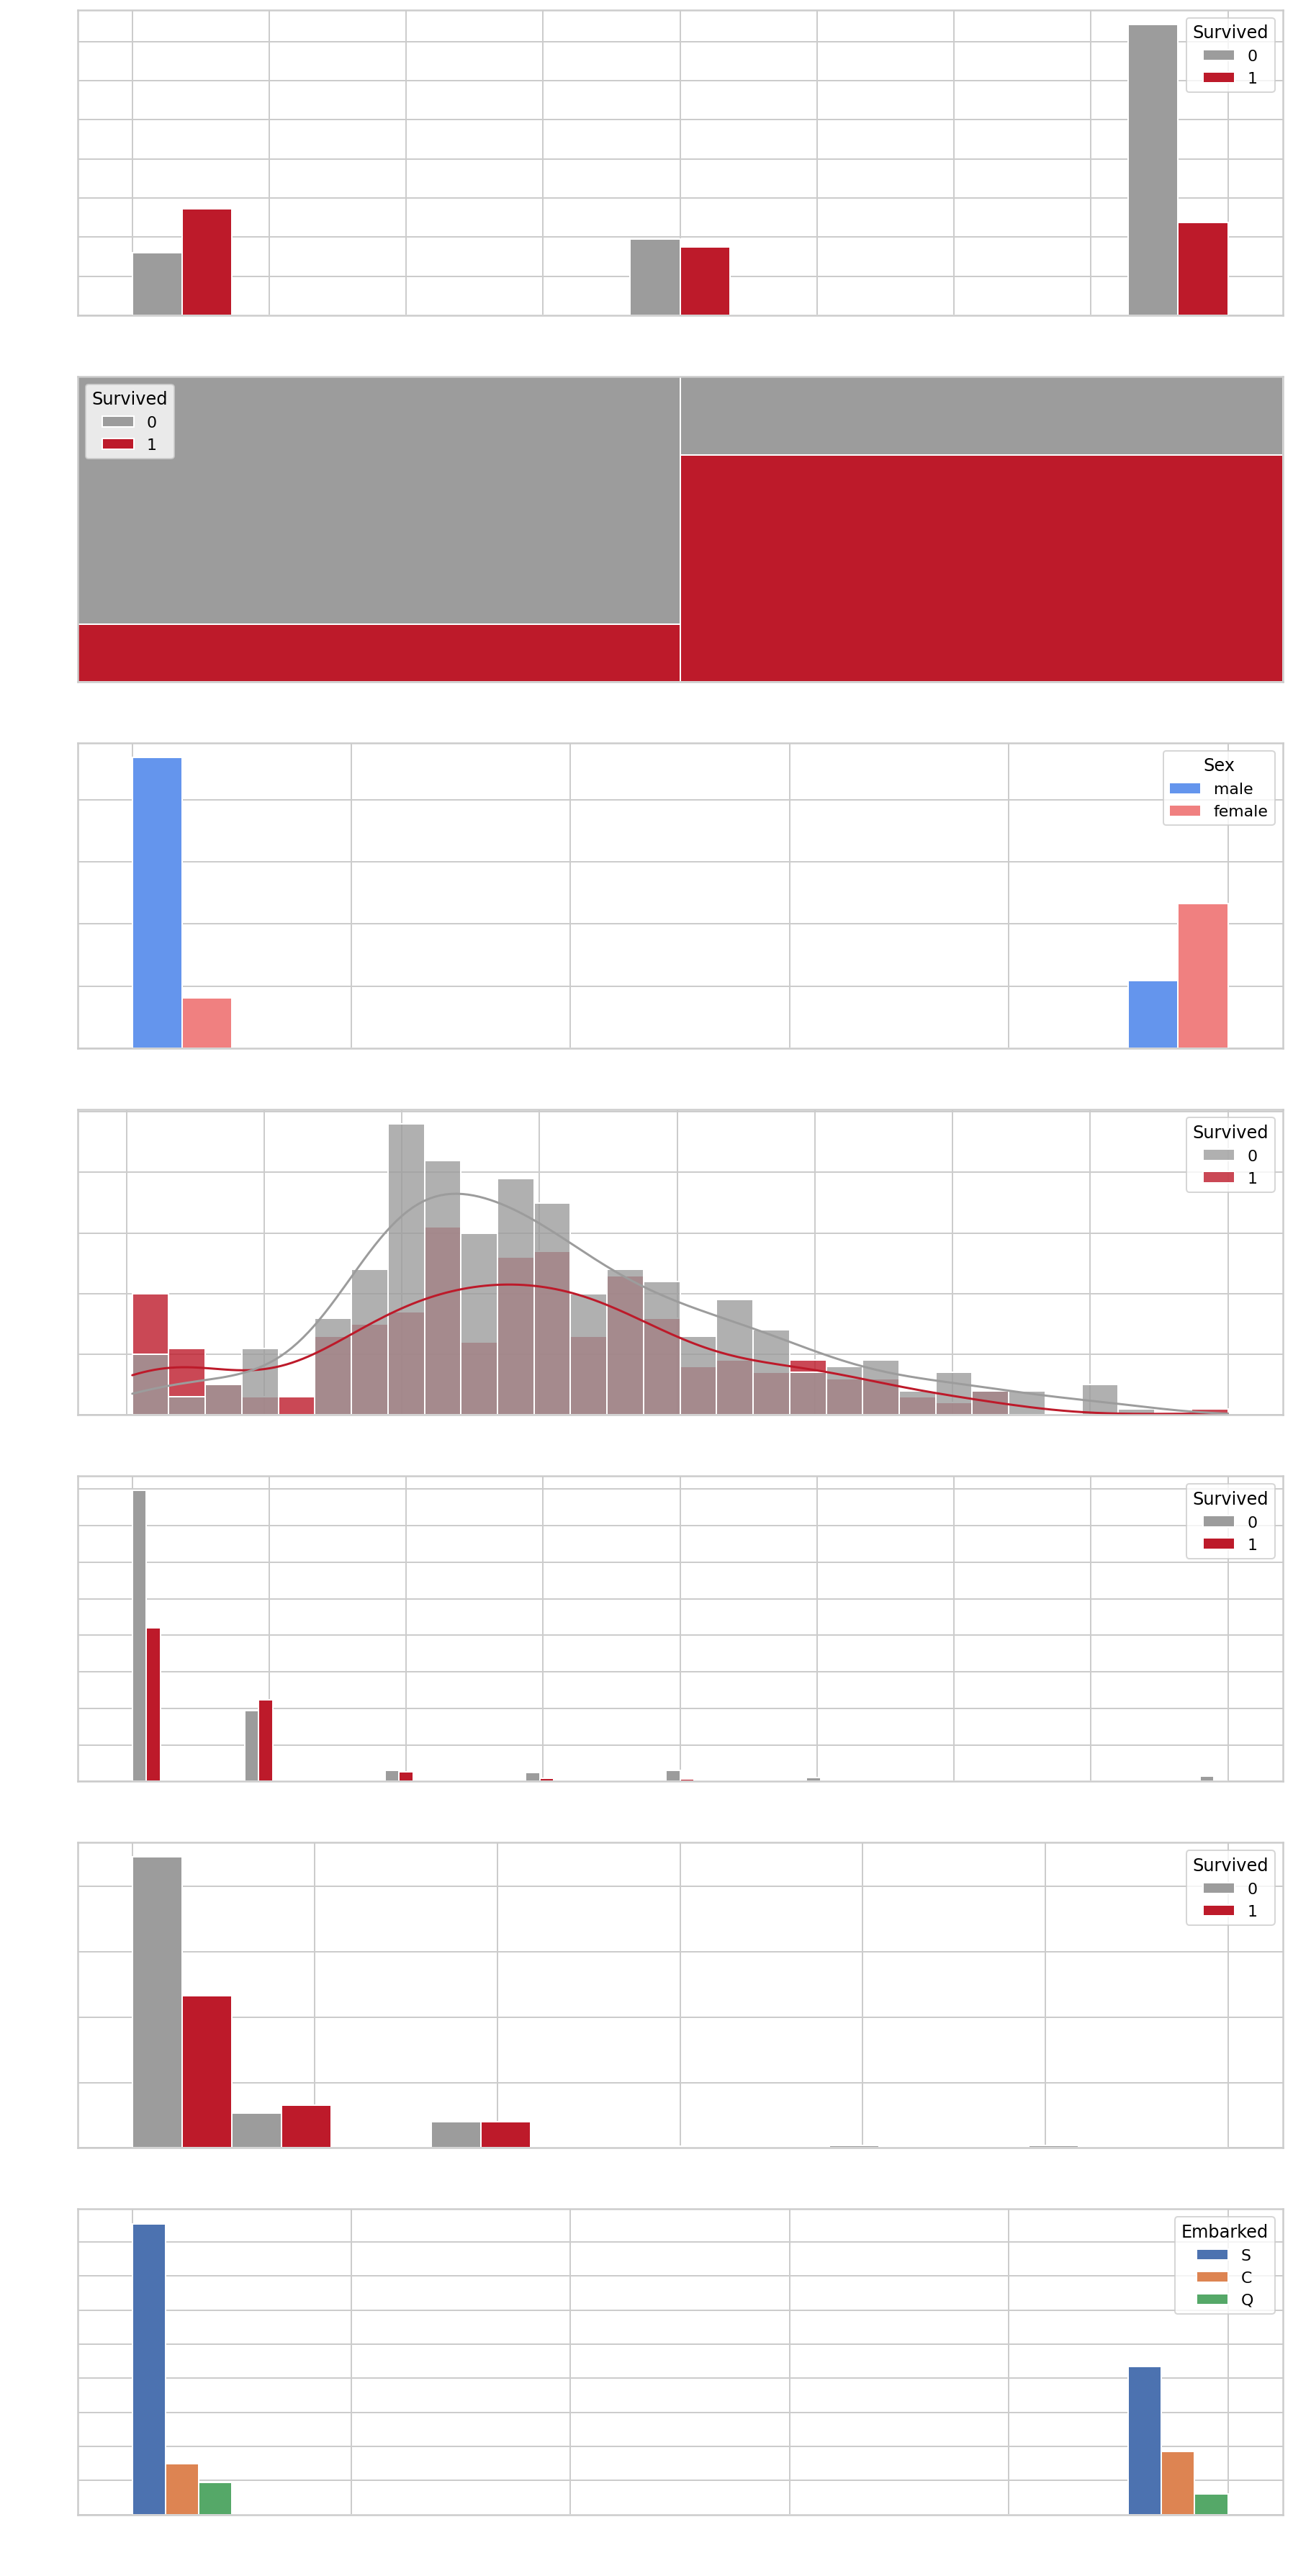

In [ ]:
figure, axes = plt.subplots(nrows=7)
figure.set_size_inches(15,32)
sns.histplot(data = train, x='Pclass', hue='Survived', multiple='dodge' , palette=palette, ax=axes[0], alpha=1)
sns.histplot(data = train, x='Sex', hue='Survived', multiple='fill', palette=palette, ax=axes[1], alpha=1)
sns.histplot(data = train, x='Survived', hue='Sex', multiple='dodge', palette=palette, ax=axes[2], alpha=1)
sns.histplot(data = train, x='Age', hue='Survived', palette=palette, ax=axes[3], kde=True, bins=30, alpha=0.8)
sns.histplot(data = train, x='SibSp', hue='Survived', multiple='dodge', palette=palette, ax=axes[4], alpha=1)
sns.histplot(data = train, x='Parch', hue='Survived', multiple='dodge', palette=palette, ax=axes[5], alpha=1)
sns.histplot(data = train, x='Survived', hue='Embarked', multiple='dodge' , ax=axes[6], alpha=1)

plt.show()

Few notes:

*   3rd class had the highest Mortality Rate, and 1st class had the highest Survival Rate
*   Most of the deceased were men
*   Fewer the SibSp and Parch, lower the Survival Rate
*   Embarked from S had the lowest Survival Rate.

We'll further look into the Embarked and see if there's any correlation between it and Pclass.




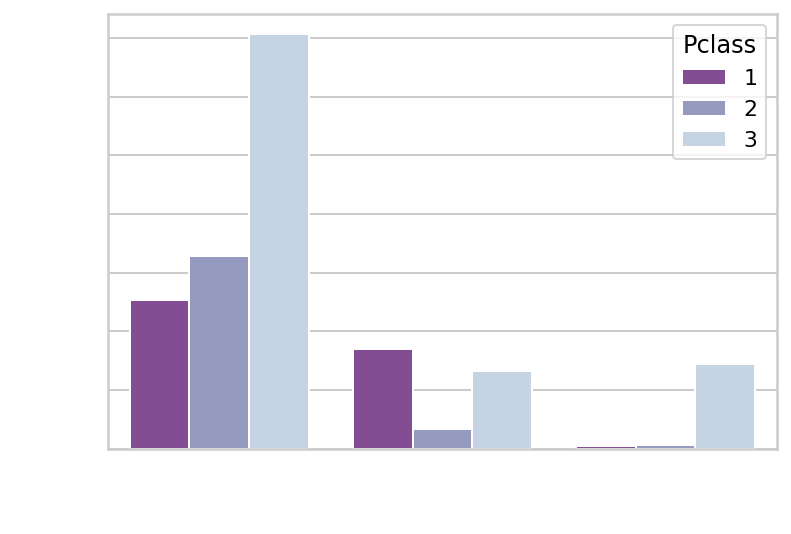

In [ ]:
sns.countplot(data=train, x='Embarked', hue='Pclass', alpha=1, palette='BuPu_r')

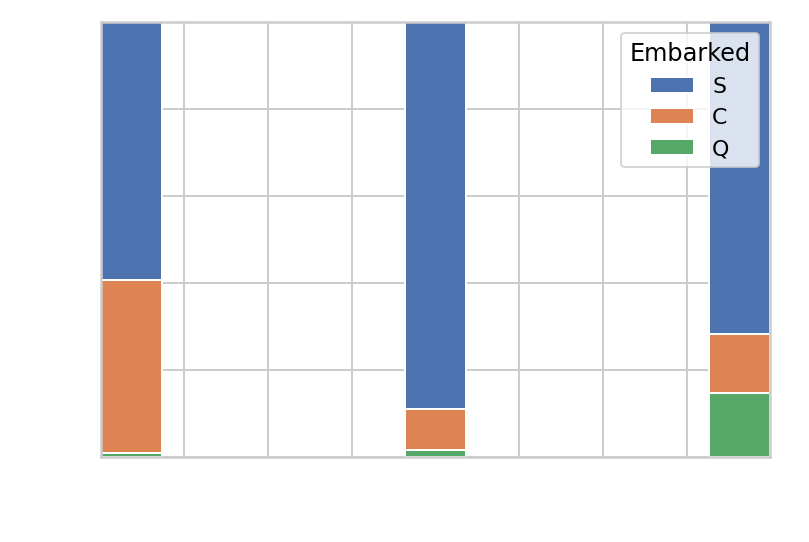

In [ ]:
sns.histplot(data=train, x='Pclass', hue='Embarked', alpha=1, multiple='fill')

The low survival rate of S may have been the result of 3rd class passengers coming mostly from S. Seems like we could disregard Embarked when modeling.

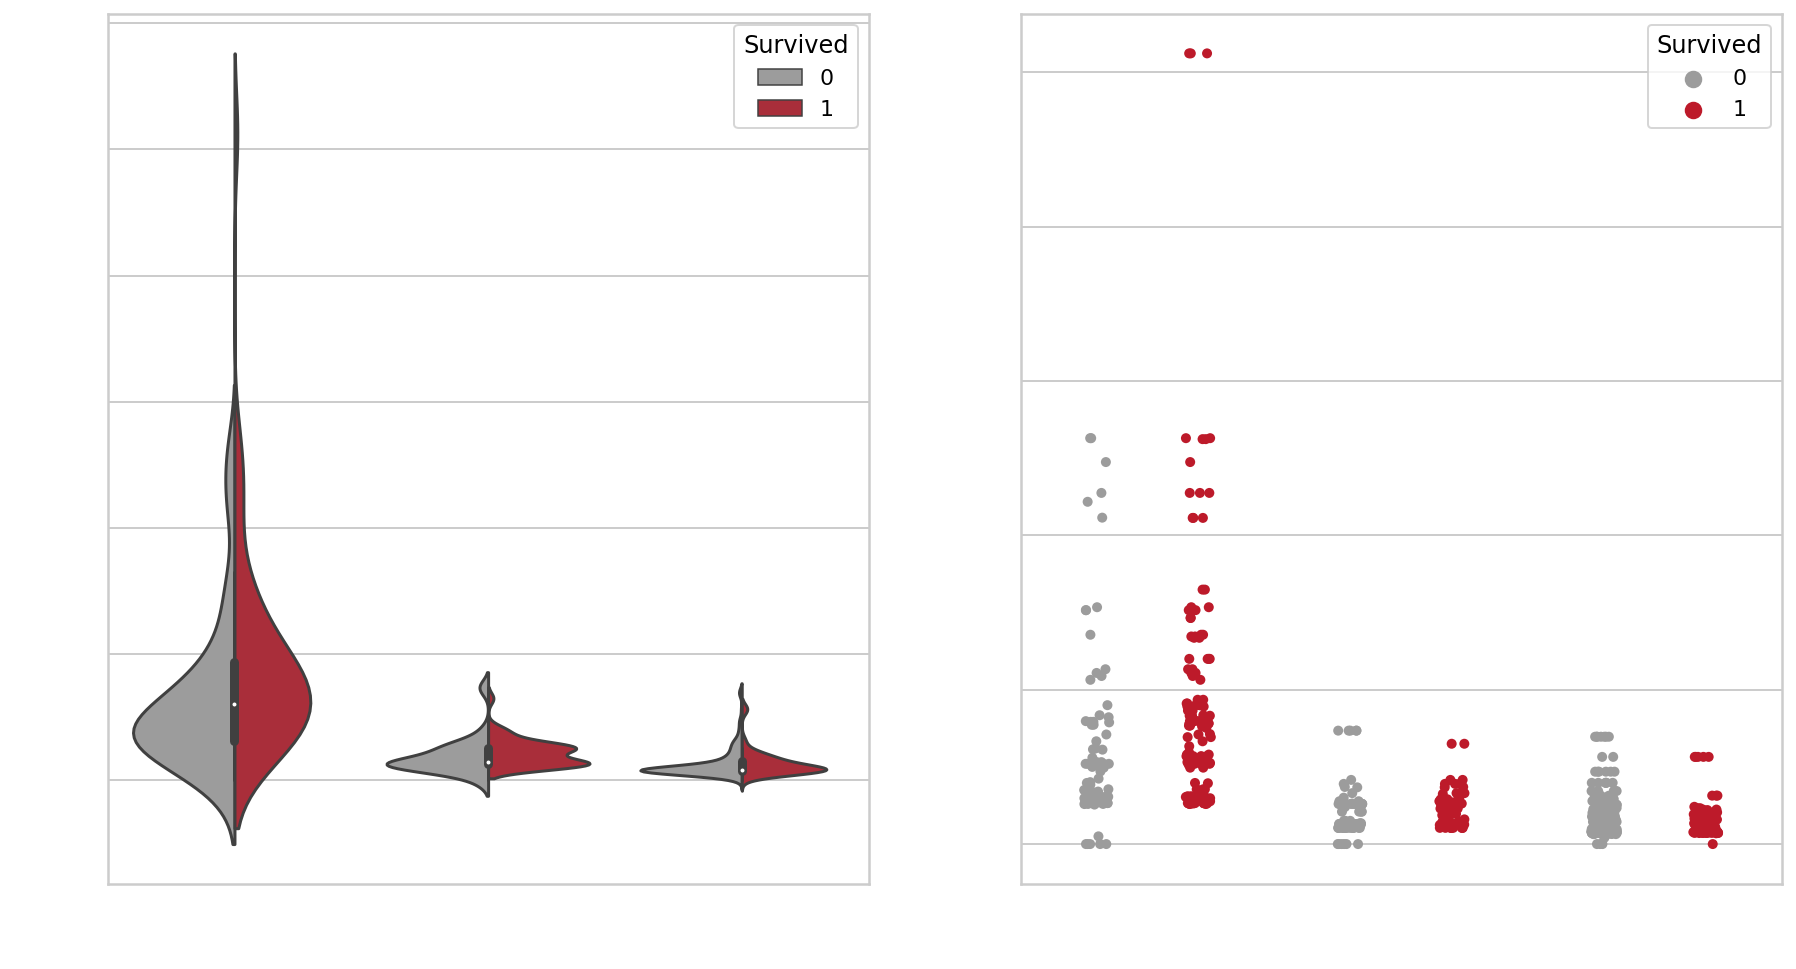

In [ ]:
figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(15,8)
sns.violinplot(data=train, x='Pclass', y='Fare', hue='Survived', palette=palette, split=True, ax=axes[0])
sns.stripplot(data=train, x='Pclass', y='Fare', hue='Survived', palette=palette, dodge=True, ax=axes[1])
plt.show()

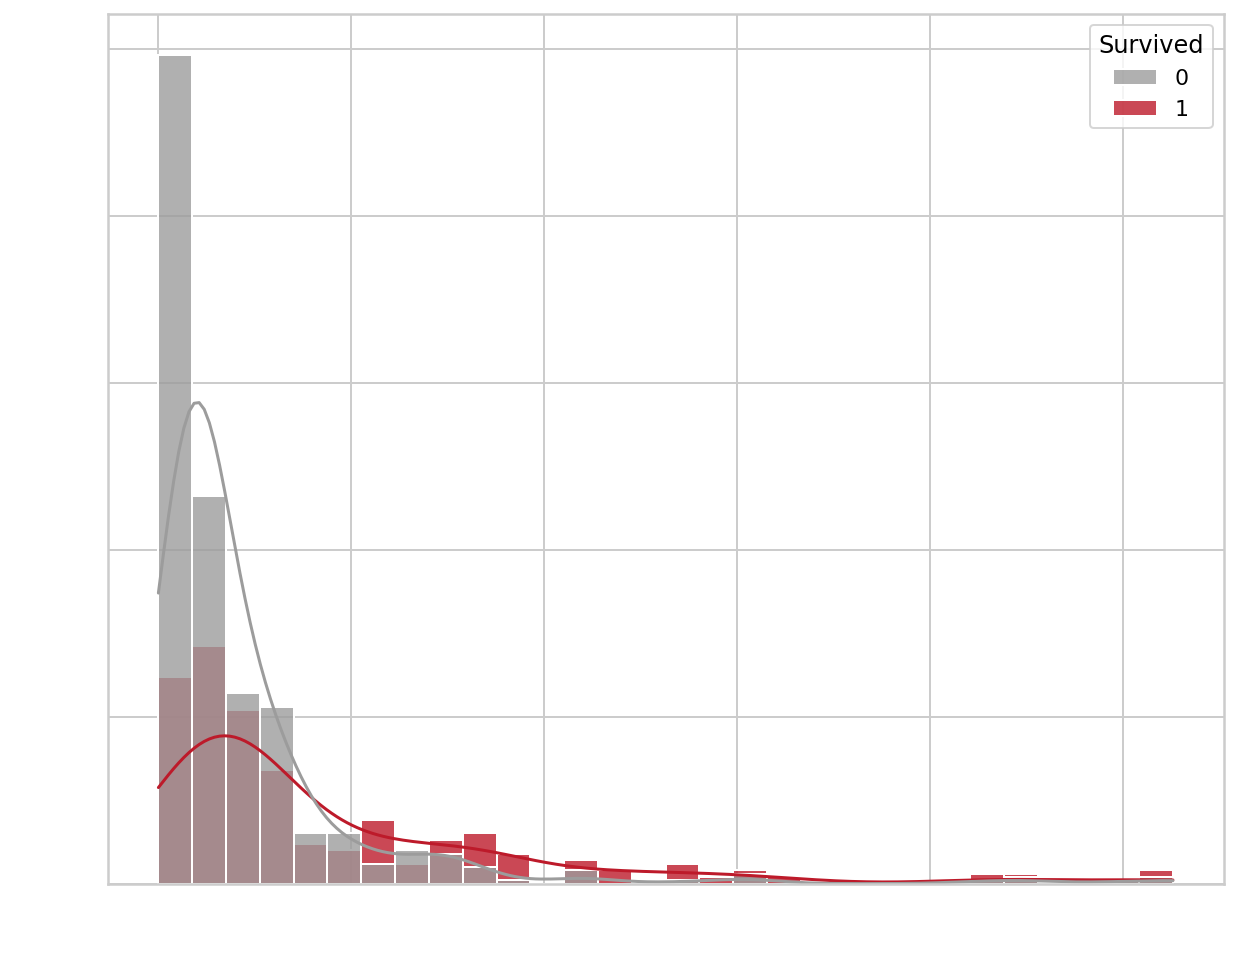

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data = train[train['Fare']<500], x='Fare', hue='Survived', palette=palette,\
             kde=True, bins=30, alpha=0.8)
plt.show()

In [ ]:
train['Famcnt'] = train['SibSp'] + train['Parch']
test['Famcnt'] = test['SibSp'] + test['Parch']

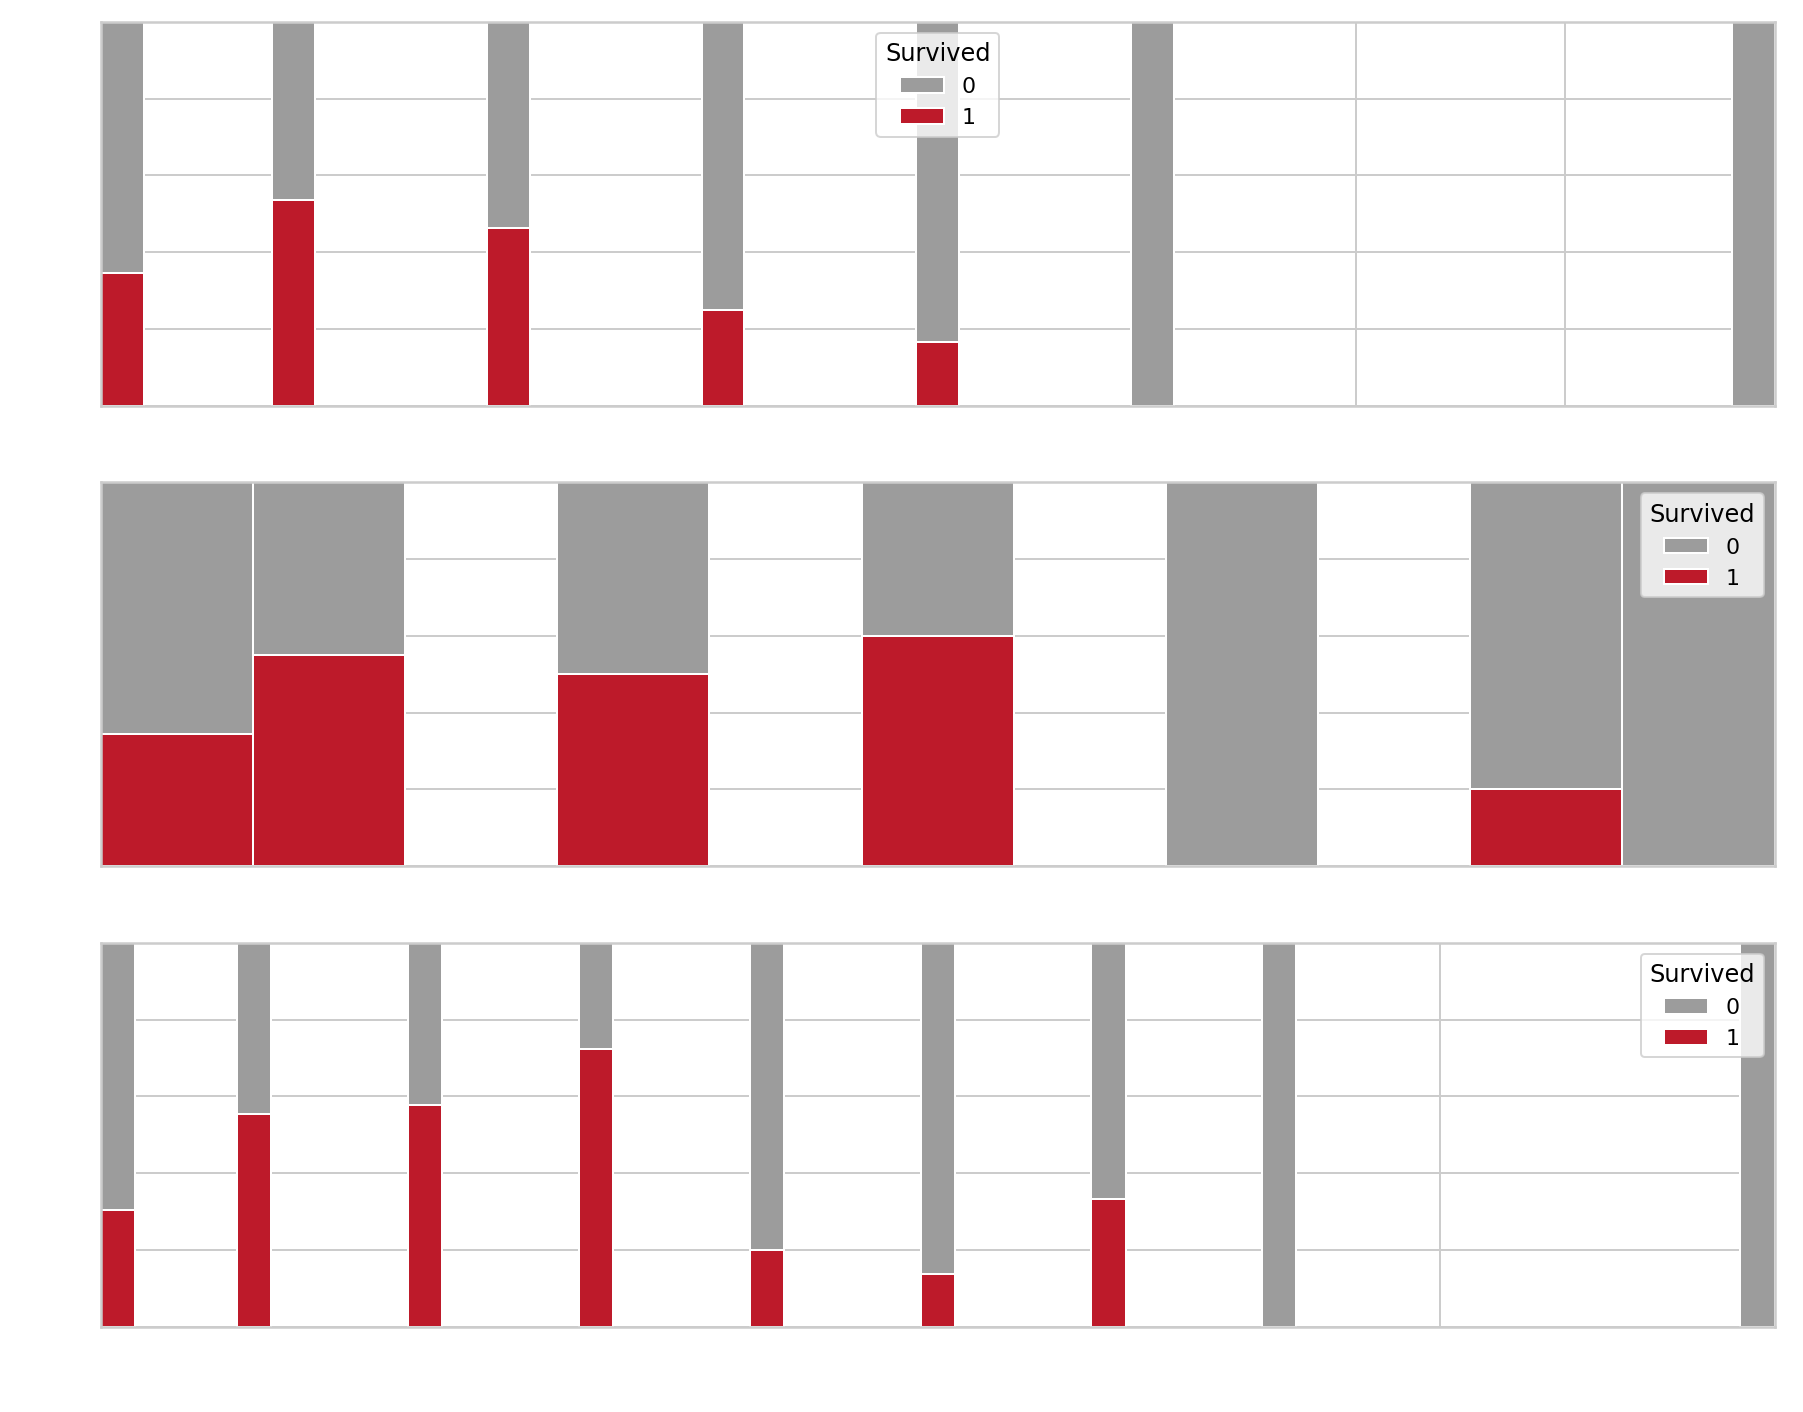

In [ ]:
figure, axes = plt.subplots(nrows=3)
figure.set_size_inches(15,12)
sns.histplot(data = train, x='SibSp', hue='Survived', multiple='fill', palette=palette, ax=axes[0], alpha=1)
sns.histplot(data = train, x='Parch', hue='Survived', multiple='fill', palette=palette, ax=axes[1], alpha=1)
sns.histplot(data = train, x='Famcnt', hue='Survived', multiple='fill', palette=palette, ax=axes[2], alpha=1)


It seems like family size, the very basic parameter that shows the number of people traveling together, has a significant correlation to the survival rate.

Family size of 4 seems to have highest survival rate.

This sounds reasonable: Anyone traveling alone would get less help from the others than the ones traveling with their family. It might be hard to take care of too many people in dire situation.

If we get the group size that takes account of the number of

  * family members traveling together

  as well as the 

  * non-related traveling companions,

we can build a better model predicting the fate of each passenger.


# Profile Report
pandas_profiling provides quick EDA tool.

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [ ]:
import pandas_profiling as pp

In [ ]:
# !pip install pandas_profiling==2.8.0

In [ ]:
pp.ProfileReport(train)### This currently uses a version that is not compatable with pandas.


TypeError: ignored

# Name
Column `Name` holds a lot of information.
Let's take a deeper look into the `Name`.

In [ ]:
train['Name'].head(50)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

We can get title from the name.

With some analysis, we can also group extended family from the last name.

Extended family will give better traveling company count and will be calculated in feature engineering section.